In [1]:
# section 1 load all the necessary modules and packages
import glob
import time
import geopandas as gpd
import netCDF4 as nc4
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import Polygon, Point
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import warnings
import sys
import os
import contextily as ctx
import matplotlib
font = {'family' : 'Times New Roman',
            'weight' : 'bold',
            'size'   : 16}
matplotlib.rc('font', **font)



/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:

hdma_cat = gpd.read_file('../data/shp/cat_3044094_HDMA.shp')
hdma_riv = gpd.read_file('../data/shp/riv_3044094_HDMA.shp')
hdma_cat_lake = gpd.read_file('../data/shp/cat_lake_area_corrected_3044094_merit.shp')
hdma_res_lake = gpd.read_file('../data/shp/lake_3044094_merit.shp')

merit_cat = gpd.read_file('../data/shp/cat_71021602_merit.shp')
merit_riv = gpd.read_file('../data/shp/riv_71021602_merit.shp')
merit_cat_lake = gpd.read_file('../data/shp/cat_lake_area_corrected_71021602_merit.shp')
merit_res_lake = gpd.read_file('../data/shp/resolved_lake_71021602_merit.shp')



/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_2368/3768816087.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hdma_res_lake.buffer(0.005).plot(ax=ax1, color='blue',zorder=2)
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_2368/3768816087.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merit_res_lake.buffer(0.005).plot(ax=ax2, color='blue',zorder=2)
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_2368/3768816087.py:66: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hdma_res_lake.buffer(0.01).plot(ax=ax3, color='blue',zorder=3)
/var/fo

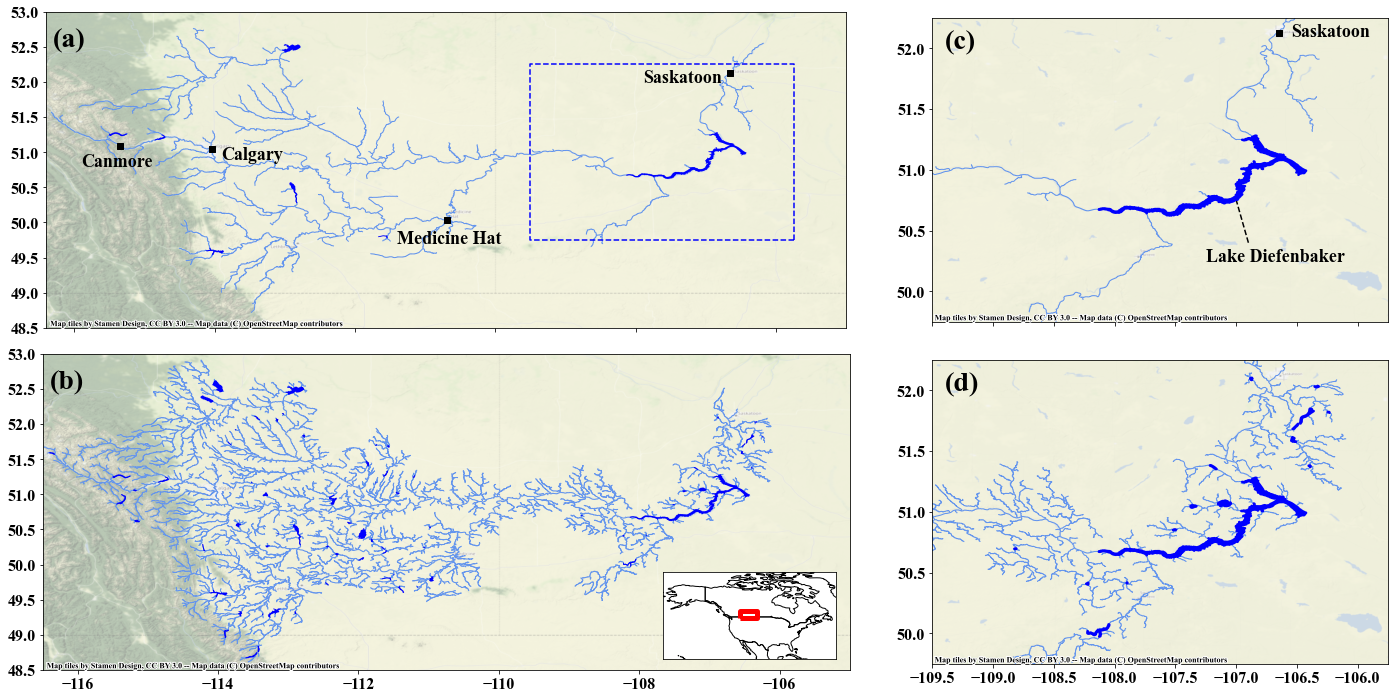

In [13]:
min_lat, max_lat, min_lon, max_lon = 49.75, 52.25, -109.5, -105.75
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame from the rectangular shape
rectangle_coords = [(max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat), (min_lon, min_lat)]
rectangle = Polygon(rectangle_coords)
geo_df = gpd.GeoDataFrame({'ID': [1]}, geometry=[rectangle])

# Create a GeoDataFrame for the city points
city_data = {'City':      ['Canmore', 'Calgary', 'Medicine Hat',  'Saskatoon'],
             'Latitude':  [   51.084,    51.039,         50.037,       52.124],
             'Longitude': [ -115.352,  -114.039,       -110.681,     -106.650]}
city_geometry = [Point(xy) for xy in zip(city_data['Longitude'], city_data['Latitude'])]
city_geo_df = gpd.GeoDataFrame(city_data, geometry=city_geometry)


# Create a 2x2 subplot configuration
fig, axs = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw={'height_ratios': [1, 1],
                                                             'width_ratios':  [2, 1]})
fig.patch.set_facecolor('white')

#
ax1 = axs[0,0]
ax2 = axs[1,0]
ax3 = axs[0,1]
ax4 = axs[1,1]

# HDMA
hdma_riv.plot(ax=ax1, color='cornflowerblue',linewidth=1.0,zorder=1)
hdma_res_lake.buffer(0.005).plot(ax=ax1, color='blue',zorder=2)
geo_df.boundary.plot(ax=ax1, color='blue', linestyle= '--',zorder=4)
city_geo_df.plot(ax=ax1, color='black',marker='s',zorder=3)
ctx.add_basemap(ax1,
                crs=hdma_riv.crs,
                zoom=8,
                alpha = 0.5,
                zorder = 0)
ax1.set_xlim([-116.4, -105])
ax1.set_ylim([48.5, 53])
ax1.set_xticklabels([])
# text
ax1.text(-116.30, 52.50, '(a)', fontsize = 28)
ax1.text(-107.9, 52.0, 'Saskatoon',    fontsize = 18,zorder=10)
ax1.text(-113.9, 50.9, 'Calgary',      fontsize = 18,zorder=10)
ax1.text(-111.4, 49.7, 'Medicine Hat', fontsize = 18,zorder=10)
ax1.text(-115.9, 50.8, 'Canmore',      fontsize = 18,zorder=10)


# MERIT
merit_riv.plot(ax=ax2, color='cornflowerblue',linewidth=1.0,zorder=1)
merit_res_lake.buffer(0.005).plot(ax=ax2, color='blue',zorder=2)
geo_df.boundary.plot(ax=ax2, color='blue', zorder=4, linewidth=0.0001)
ctx.add_basemap(ax2,
                crs=hdma_riv.crs,
                zoom=8,
                alpha = 0.5,
                zorder = 0)
ax2.text(-116.40, 52.50, '(b)', fontsize = 28)
ax2.set_xlim([-116.5, -105])
ax2.set_ylim([48.5, 53])


# HDMA zoom in
#hdma_cat.boundary.plot(ax=ax3, color='k', linewidth=0.20, zorder=1)
hdma_riv.plot(ax=ax3, color='cornflowerblue', linewidth=1.00, zorder=2)
hdma_res_lake.buffer(0.01).plot(ax=ax3, color='blue',zorder=3)
ctx.add_basemap(ax3,
                crs=hdma_riv.crs,
                zoom=9,
                alpha = 0.5,
                zorder = -1)
ax3.set_xlim([min_lon, max_lon])
ax3.set_ylim([min_lat, max_lat])
ax3.set_xticklabels([])
city_geo_df.plot(ax=ax3, color='black',marker='s',zorder=3)
# text
ax3.text(-109.40, 52.00, '(c)', fontsize = 28)
ax3.text(-106.55, 52.10, 'Saskatoon', fontsize = 18,zorder=18)
ax3.text(-107.25, 50.25, 'Lake Diefenbaker', fontsize = 18)
ax3.plot([-106.90, -107.00],[50.4,50.75],'--k')

# MERIT zoom in
#merit_cat.boundary.plot(ax=ax4, color='k', linewidth=0.20, zorder=1)
merit_riv.plot(ax=ax4, color='cornflowerblue', linewidth=1.00, zorder=2)
merit_res_lake.buffer(0.01).plot(ax=ax4, color='blue',zorder=3)
ctx.add_basemap(ax4,
                crs=hdma_riv.crs,
                zoom=9,
                alpha = 0.5,
                zorder = -1)
ax4.set_xlim([min_lon, max_lon])
ax4.set_ylim([min_lat, max_lat])
#text
ax4.text(-109.40, 52.00, '(d)', fontsize = 28)


# inset
ax5 =fig.add_axes([0.42,0.07,0.24,0.12])
ax5.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
# Plot the world countries
world.plot(ax=ax5, facecolor='none',
                   edgecolor='black')
ax5.axes.set_xlim(-170,-50)
ax5.axes.set_ylim(20,80)

#
rectangle = Polygon([(-117, 48), (-105, 48), (-105, 53), (-117, 53)])
# Create a GeoDataFrame with the rectangle polygon
rectangle = gpd.GeoDataFrame(geometry=[rectangle])
rectangle.plot(ax=ax5,facecolor='none',
               edgecolor='red', linewidth=5)

# Adjust layout
plt.tight_layout()

# Show the plot
#plt.show()

# save figure
if not os.path.isdir('../fig/'):
    os.makedirs('../fig/')
    
plt.savefig('../fig/South_Sask.png')


## match the grand id and lake id for the lake_param_HYPE_slice and save in lake_param_HYPE_grand_to_HydroLake

In [25]:
# if os.path.isfile('../lake_param/lake_param_HYPE_slice.csv'):
#     os.remove('../lake_param/lake_param_HYPE_slice.csv')
# df = pd.read_csv('../lake_param/lake_param_HYPE.csv')
# link = pd.read_csv('../lake_param/lake_param_HYPE_grand_to_HydroLake.csv')

# Grand_id = np.array(link['GRAND_ID'])
# Hylak_id = np.array(link['Hylak_id'])

# indx = df.index[df['GRAND_ID'].isin(Grand_id)]
# print(indx)

# df['Hylak_id'] = 0 # set the existing lakes to zero
# df['Hylak_id'].loc[indx] = Hylak_id # pass the hylak_id

# # remove the Hylak_id that are 0
# df = df[df['Hylak_id']>0]
# df = df.reset_index(drop=True)

# df.to_csv('../lake_param/lake_param_HYPE_Saskatoon.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../lake_param/lake_param_HYPE.csv'

In [61]:
# Ntopo = pd.read_csv('../network_topology/Saskatoon.csv')
# Hanasaki = pd.read_csv('../lake_param/lake_param_Hanasaki_Saskatoon.csv')
# HYPE = pd.read_csv('../lake_param/lake_param_HYPE_Saskatoon.csv')

# Ntopo_before = len(Ntopo)



# Hanasaki['ID'] = Hanasaki['lakeId']
# HYPE['ID'] = HYPE['Hylak_id']

# HYPE_before = print(len(HYPE))

# # if there is a HYPE and Hanasaki choose Hanasaki
# shared_ID = np.intersect1d(np.array(Hanasaki['ID']), np.array(HYPE['ID']))
# if shared_ID.size == 0:
#     HYPE_retain = np.setdiff1d(np.array(HYPE['ID']), shared_ID)
#     HYPE = HYPE [HYPE['ID'].isin(HYPE_retain)]

# HYPE_after = print(len(HYPE))

# if HYPE_before != HYPE_after:
#     print('the IDs were removed from the HYPE, to be considered as Hanasaki')
#     print(shared_ID)
#     if len(shared_ID) == (HYPE_before - HYPE_after):
#         print('number of HYPE reduced:', HYPE_before - HYPE_after)
#         print('number of shared_ID', len(shared_ID))
#     else:
#         print('sth is wrong!')


# Ntopo = pd.merge(Ntopo, Hanasaki, on=['ID'], how='outer')
# Ntopo = pd.merge(Ntopo, HYPE, on=['ID'], how='outer')


# Ntopo_after = len(Ntopo)

# Ntopo = Ntopo.fillna(-9999)

# if Ntopo_before == Ntopo_after:
#     print('Ntopo before and after are the same length, seems good to go!')
#     Ntopo.to_csv('../lake_param/test.csv')
# else:
#     print('sth is wrong, Ntopo before and after are different')


11
11
Ntopo before and after are the same length, seems good to go!


In [62]:
# # save the network topology
# Ntopo = pd.read_csv('../network_topology/Saskatoon_NTOPO_lake.csv')
# Ntopo_flags = pd.read_csv('../network_topology/Saskatoon_NTOPO_lake_flag.csv')
# Ntopo_file_name = '../network_topology/Saskatoon_NTOPO_lake.nc'
# nc_creation(Ntopo, Ntopo_flags, Ntopo_file_name)

# #
# ds = xr.open_dataset('../network_topology/Saskatoon_NTOPO_lake.nc')
# print(ds)


,Unnamed: 0_x,ID,next_ID,area,length,is_lake,outflow,inflow,endorheic,slope,...,BR_MX_MAIN,BR_MN_MAIN,BR_MX_BR,BR_DEST_LONWGS84,BR_DEST_LATWGS84,SOURCE,SOURCE_ELEVS,SOURCE_OPS,SOURCE_SPILL,SOURCE_BRAN
0,0,643,71027284,3.917200e+08,1.000000,1,-1.0,-1.0,0,0.001,...,0.0,0.0,0.0,0.0,0.0,11.0,HHYPEv3 DamData,HHYPEv3 DamData,AHYPEv4 LakeData,*NONE*
1,1,7191,71023817,7.928000e+07,1.000000,1,-1.0,-1.0,0,0.001,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999
2,2,7209,71022872,8.619000e+07,1.000000,1,-1.0,-1.0,0,0.001,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999
3,3,7237,71023994,4.238000e+07,1.000000,1,-1.0,-1.0,0,0.001,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999
4,4,7363,71029837,1.207000e+07,1.000000,1,-1.0,-1.0,0,0.001,...,0.0,0.0,0.0,0.0,0.0,11.0,HHYPEv3 DamData,HHYPEv3 DamData,AHYPEv4 LakeData,*NONE*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,3058,71046848,71045374,3.918906e+07,5247.541353,0,-1.0,-1.0,0,0.001,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999
3059,3059,71046869,71045147,7.584365e+07,14100.790971,0,-1.0,-1.0,0,0.001,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999
3060,3060,71046901,71044780,3.094328e+07,2285.562412,0,-1.0,-1.0,0,0.001,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999
3061,3061,71046927,71045205,3.686062e+07,5105.747478,0,-1.0,-1.0,0,0.001,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999
